<a href="https://colab.research.google.com/github/shiyasAli/Health-insurance-cross-sell-prediction/blob/main/Copy_of_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import scipy
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We will start our venture by forming a data frame out of the CSV file.

In [3]:
#Copying the file and forming a DataFrame
file_path='/content/drive/MyDrive/Colab Notebooks/Almabetter/Supervised ML_Capastone/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
df=pd.read_csv(file_path)

Let's get a hold of what we have got here.

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

We have 11 features in total.Some of them are continuous and others are categorical.The 'id' column can be dropped outright as it doesn't contain any information about the target.Let's also check for duplicate and null values.

In [4]:
#Dropping 'id' column
df.drop('id',inplace=True,axis=1)

In [5]:
#Defining a function to find and drop duplicates from a dataframe.Calling it on df.
def drop_duplicate(frame):
  duplicate_count=frame.duplicated(keep='first').sum()
  if duplicate_count > 0 :
    print('Dropping %d rows... \n'%(duplicate_count))
    frame.drop_duplicates(keep='first',inplace=True,ignore_index=True)
  else :
    print('No duplicate rows to drop')
drop_duplicate(df)

Dropping 269 rows... 



In [36]:
#Creating and displaying a dataframe which shows missing value counts.
df.isna().sum(axis=0).reset_index().rename(columns={'index':'Features',0:'Null count'})

,Features,Null count
0,Gender,0
1,Age,0
2,Driving_License,0
3,Region_Code,0
4,Previously_Insured,0
5,Vehicle_Age,0
6,Vehicle_Damage,0
7,Annual_Premium,0
8,Policy_Sales_Channel,0
9,Vintage,0


We have dropped some duplicate entries from our dataset.The dataset doesn't contain any null values.Now,let's dive deep into the dataset and find the characteristics of features.We will implement some feature selection along with exploratory data analysis.

In [39]:
#listing numerical and categorical features for EDA
numerical_features=[feature for feature in df.columns if df[feature].dtype != 'object']
print('Numerical features in the dataset are: \n')
print(numerical_features)
categorical_features=[feature for feature in df.columns if feature not in numerical_features ]
print('\nCategorical Features in the dataset are : \n')
print(categorical_features)

Numerical features in the dataset are: 

['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']

Categorical Features in the dataset are : 

['Gender', 'Vehicle_Age', 'Vehicle_Damage']


Now, it's the time to define our target variable and analyse it.our target is to predict the response from the customers.

Number of people interested : 46685
Number of people not interested : 334155


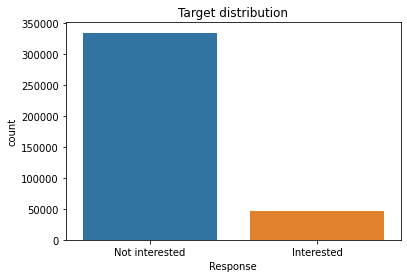

In [40]:
#Defining the target variable and plotting the count.
y=df['Response']
N,Y = y.value_counts()
print('Number of people interested : {}'.format(Y))
print('Number of people not interested : {}'.format(N))
ax=sns.countplot(x='Response',data=df)
ax.set_xticklabels(['Not interested','Interested'])
ax.set_title('Target distribution')
plt.show()

As we have explored our target variable,let's move on to other variables in the dataset.We will consider numerical features first and go to the categorical variables then.

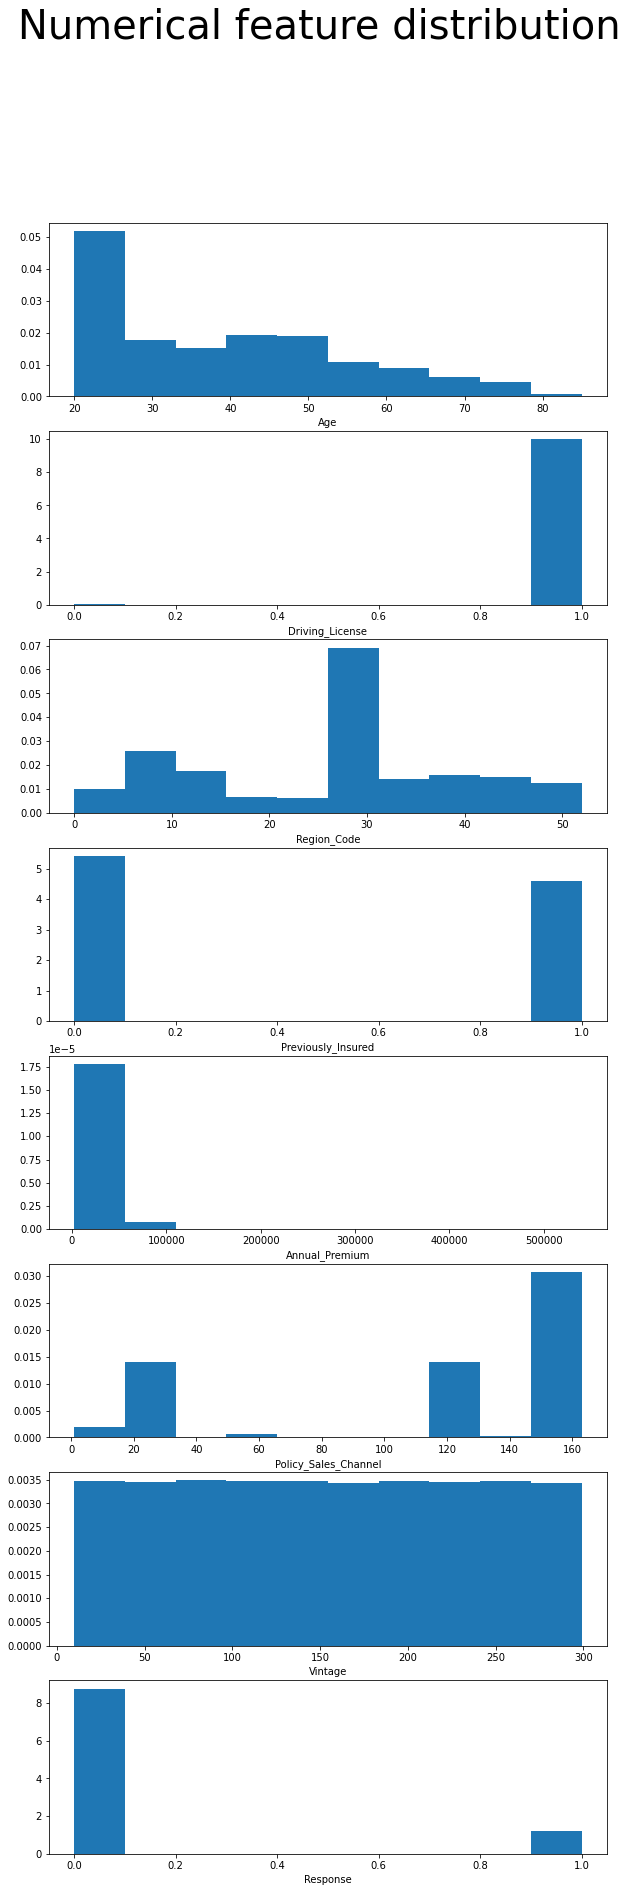

In [48]:
#Plotting the distribution of numerical variables.
fig,ax=plt.subplots(len(numerical_features),1)
plt.rcParams['figure.figsize']=(10,30)
plt.suptitle('Numerical feature distribution',fontsize=40)
for index,feature in enumerate(numerical_features):
  ax[index].hist(df[feature],density=True)
  ax[index].set_xlabel(feature)

From the above distribution plot,we  find 'Driving_License' column heavily unbalanced.Let's analyse it more and see whether we can drop it.All the remaining features are left untouched for the time being.

In [6]:
#Dropping 'Driving_Licence column as it is biased.
one_percentage=((df['Driving_License']==1).sum()/df['Driving_License'].count())*100
print('%f percentage of the values are 1 \n'%(one_percentage))
print('dropping \'Driving_License\' column...')
df.drop('Driving_License',axis=1,inplace=True)

99.786787 percentage of the values are 1 

dropping 'Driving_License' column...


We have seen the distribution of numerical  features.Now let's see how categorical features are distributed.

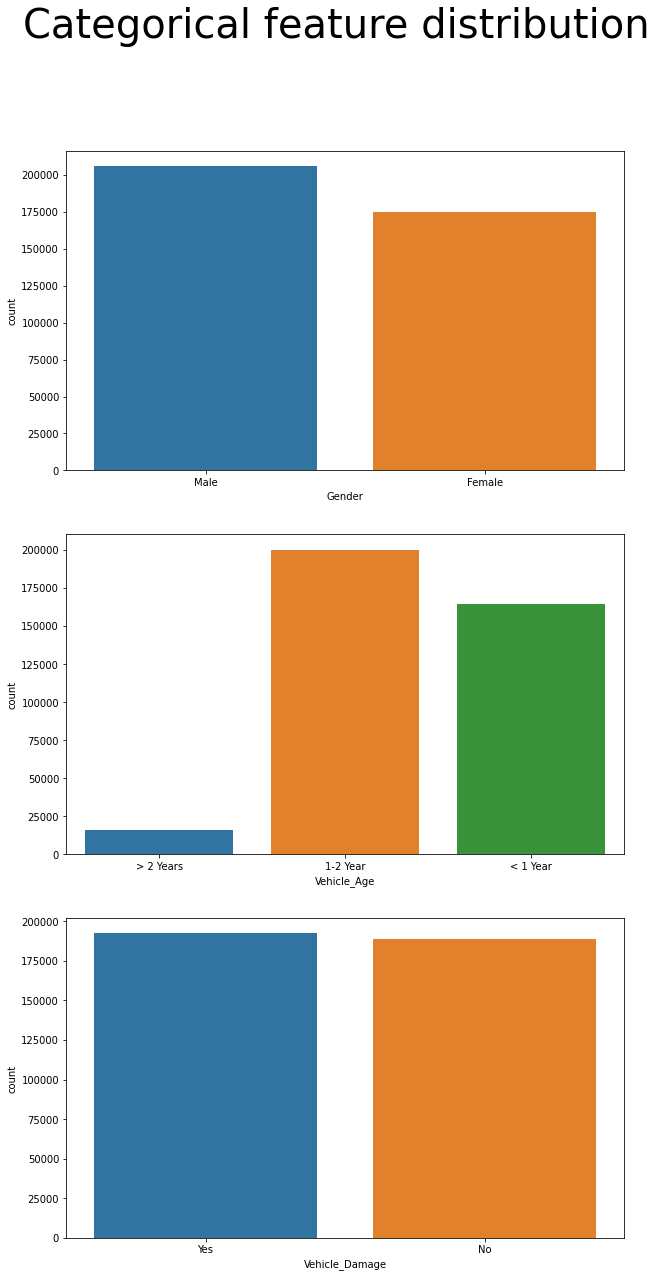

In [55]:
#Plotting categorical variable distribution
plt.rcParams['figure.figsize']=(10,20)
for index,feature in enumerate (categorical_features):
  plt.subplot(len(categorical_features),1,index+1)
  sns.countplot(feature,data=df)
plt.suptitle('Categorical feature distribution',fontsize=40)
fig.show()


We have so far done univariate analysis on features. Next, we will see how features vary according to our target variable. As done before, we will first consider numerical variables.

In [56]:
#Creating a dataframe of numerical features and converting it into long format.
independent_numerical_features=[feature for feature in df.describe().columns if feature!='Response']
df_independent_numerical=df[independent_numerical_features]
df_independent_numerical_normalized=(df_independent_numerical-df_independent_numerical.mean())/df_independent_numerical.std()
Data=pd.concat([y,df_independent_numerical_normalized],axis=1)
Data=pd.melt(frame=Data,id_vars='Response',var_name='Features',value_name='Value')


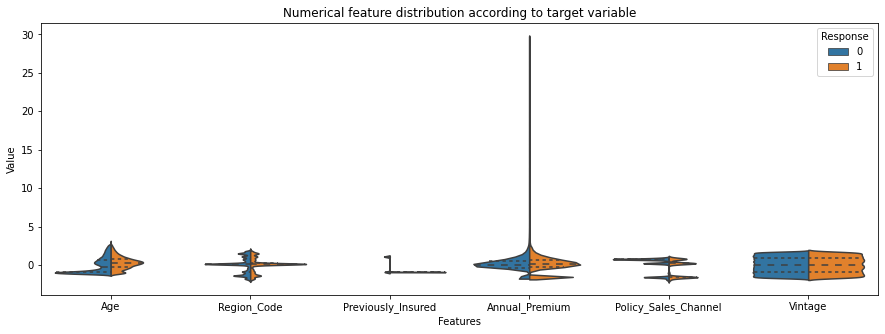

In [58]:
#Plotting a violin plot to see how numerical feature distribution vary according to response
plt.figure(figsize=[15,5])
ax=sns.violinplot(x='Features',y='Value',hue='Response',data=Data,split=True,inner='quart')
plt.title('Numerical feature distribution according to target variable')
plt.show()

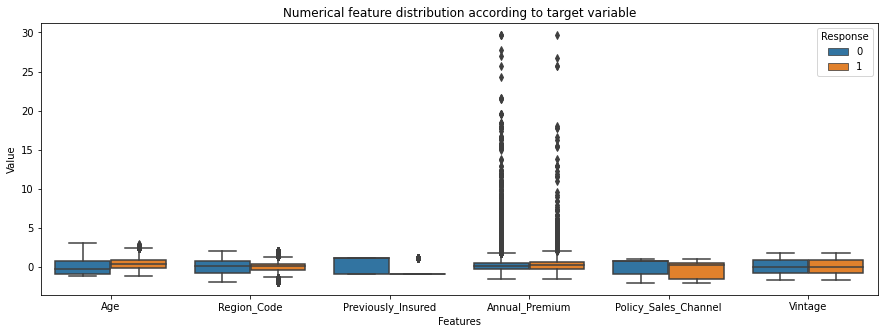

In [59]:
#Plotting a box plot to see how numerical feature distribution vary according to response
plt.figure(figsize=[15,5])
ax=sns.boxplot(x='Features',y='Value',hue='Response',data=Data)
plt.title('Numerical feature distribution according to target variable')
plt.show()

From the above box plot and violin plot, We see that distribution of *'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel',* and *'Vintage'* doesn't vary much according to target variable.Also,some features have got many outliers. We will leave it as such for now.Next, let's find out whether the categorical features and target variable are dependent. We will use chi-square test.

In [62]:
#Defining a function to calculate the p value of chi-square test and calling it on each categorical variable.
def p_value_calculator(feature):
  data_crosstab=pd.crosstab(df['Response'],df[feature],margins=False)
  Chi2,p,dof,expected=scipy.stats.chi2_contingency(data_crosstab)
  print('p-value of {} is {} \n'.format(feature,p))
for feature in categorical_features:
  p_value_calculator(feature)

p-value of Gender is 5.3788975019355325e-230 

p-value of Vehicle_Age is 0.0 

p-value of Vehicle_Damage is 0.0 



From chi-square test conducted above, we can infer that, all the three categorical features are relevant for our purpose. The dichotomous categorical variables can be converted into binary variables. *'Vehicle_age'* feature should be encoded.

In [7]:
#converting dichotomous categorical variable into binary numerical variable.
df['Vehicle_Damage']=df['Vehicle_Damage'].apply(lambda x : 1 if x=='Yes' else 0)
df['Gender']=df['Gender'].apply(lambda x : 1 if x=='Male' else 0)

In [8]:
df.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,1,76,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,1,47,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,1,21,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,0,29,41.0,1,< 1 Year,0,27496.0,152.0,39,0


As the categorical features are converted into numerical, let's use correlation coefficient and information gain to find feature importance.

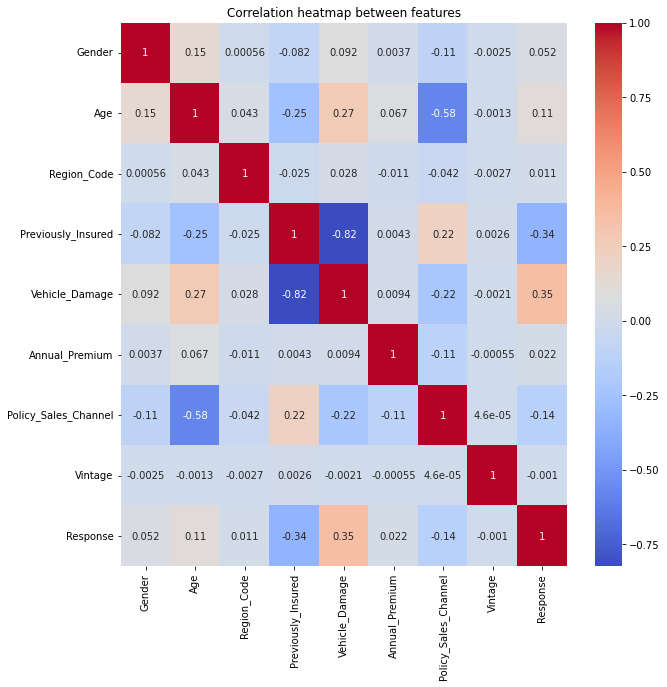

In [65]:
#Plotting a correlation heatmap between features
plt.figure(figsize=(10,10))
ax=sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.title('Correlation heatmap between features')
plt.show()

Text(0.5, 1.0, 'Feature importance according to information gain')

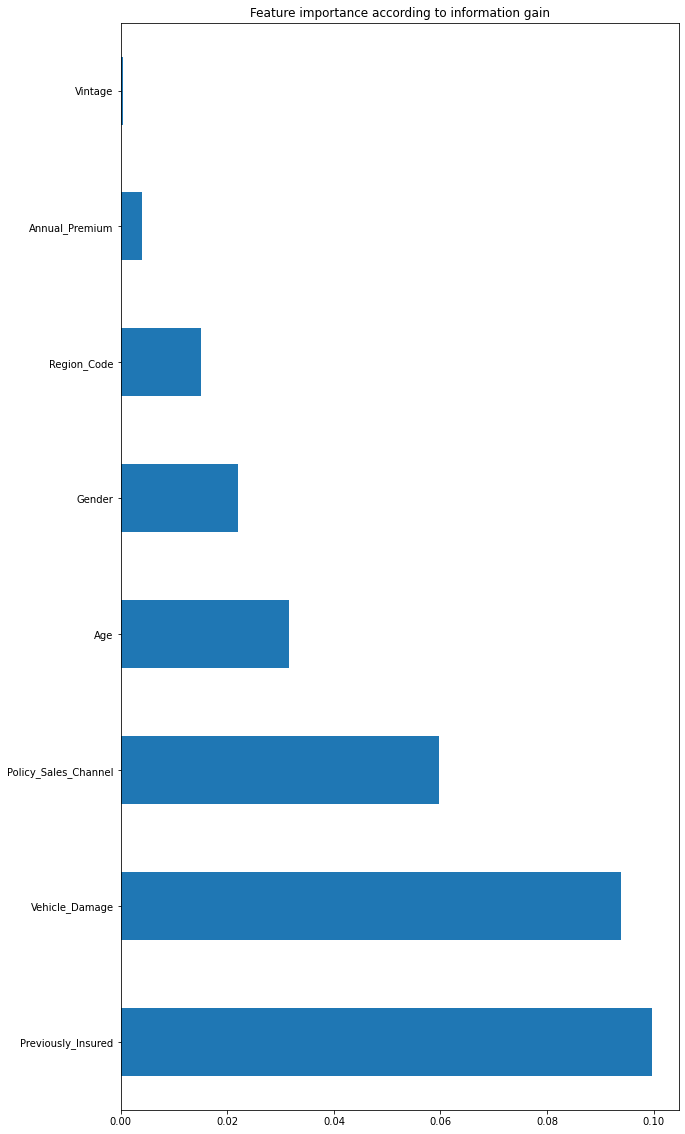

In [67]:
independent_numerical_features=[feature for feature in df.columns if feature not in ['Vehicle_Age','Response']]
df_independent_numerical=df[independent_numerical_features]
importance=mutual_info_classif(df_independent_numerical,y)
feature_importance=pd.Series(importance,df_independent_numerical.columns)
feature_importance.sort_values(ascending=False,inplace=True,ignore_index=False)
feature_importance.plot(kind='barh')
plt.title('Feature importance according to information gain')

After doing chi-square test, correlation coefficient analysis and information gain analysis, we find *'Age', 'Previously_Insured', 'Policy_Sales_Channel' , 'Vehicle_Age', 'Vehicle_Damage'* and *'Gender'* to be the relevant features.

In [9]:
relevent_indpendent_features=['Age','Previusly_Insured','Policy_Sales_channel','Vehicle_age','Vehicle_Damage','Gender']

In [10]:
#encoding categorical variable 'Vehicle_Age'.
enc=OneHotEncoder(handle_unknown='ignore')
enc_df=pd.DataFrame(enc.fit_transform(df[['Vehicle_Age']]).toarray())
enc_df.rename(columns={0:'1-2 Years',1:'<1 Year',2:'>2 Year'},inplace=True)
enc_df
df=pd.concat([df,enc_df],axis=1)
df.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1-2 Years,<1 Year,>2 Year
0,1,44,28.0,0,> 2 Years,1,40454.0,26.0,217,1,0.0,0.0,1.0
1,1,76,3.0,0,1-2 Year,0,33536.0,26.0,183,0,1.0,0.0,0.0
2,1,47,28.0,0,> 2 Years,1,38294.0,26.0,27,1,0.0,0.0,1.0
3,1,21,11.0,1,< 1 Year,0,28619.0,152.0,203,0,0.0,1.0,0.0
4,0,29,41.0,1,< 1 Year,0,27496.0,152.0,39,0,0.0,1.0,0.0


In [11]:
df.drop(['Vehicle_Age','Region_Code','Vintage','Annual_Premium'],axis=1,inplace=True)

In [12]:
drop_duplicate(df)

Dropping 360002 rows... 



In [13]:
df['Response'].value_counts()

0    16304
1     4534
Name: Response, dtype: int64

In [14]:
independent_features=[feature for feature in df.columns if feature != 'Response']
independent_features

['Gender',
 'Age',
 'Previously_Insured',
 'Vehicle_Damage',
 'Policy_Sales_Channel',
 '1-2 Years',
 '<1 Year',
 '>2 Year']

So far we have done EDA, feature selection and feature engineering. Now, we are left with the dataset useful for training.Next, we are going to fit various models to our data and evaluate their performance on both training and test dataset. We will begin with Logistic regression model

In [59]:
#Defining a function to evaluate models
def model_evaluator(model,X_train,y_train,X_test,y_test):
  y_pred_train=model.predict(X_train)
  y_pred_proba_train=model.predict_proba(X_train)
  y_pred_test=model.predict(X_test)
  y_pred_proba_test=model.predict_proba(X_test)
  accuracy_train=accuracy_score(y_train,y_pred_train)
  precision_train=precision_score(y_train,y_pred_train)
  recall_train=recall_score(y_train,y_pred_train)
  f1_train=f1_score(y_train,y_pred_train)
  auc_train=roc_auc_score(y_train,y_pred_proba_train[:,1])
  print('Evaluation metrics for training  data...\n ')
  print('Accuracy : {}\n'.format(accuracy_train))
  print('Precision : {}\n'.format(precision_train))
  print('Recall : {}\n'.format(recall_train))
  print('F1 score : {}\n'.format(f1_train))
  print('AUC-ROC : {}\n'.format(auc_train))
  
  accuracy_test=accuracy_score(y_test,y_pred_test)
  precision_test=precision_score(y_test,y_pred_test)
  recall_test=recall_score(y_test,y_pred_test)
  f1_test=f1_score(y_test,y_pred_test)
  auc_test=roc_auc_score(y_test,y_pred_proba_test[:,1])
  print('Evaluation metrics for test  data...\n ')
  print('Accuracy : {}\n'.format(accuracy_test))
  print('Precision : {}\n'.format(precision_test))
  print('Recall : {}\n'.format(recall_test))
  print('F1 score : {}\n'.format(f1_test))
  print('AUC-ROC : {}\n'.format(auc_test))

  train_score=[accuracy_train,precision_train,recall_train,f1_train,auc_train]
  test_score=[accuracy_test,precision_test,recall_test,f1_test,auc_test]

  return (train_score,test_score)


In [60]:
train_metric_dict={}
test_metric_dict={}

In [61]:
#Defining dependent and independent data
X=df[independent_features]
y=df["Response"]

In [62]:
#Calculating variance inflation factor
VIF_df=pd.DataFrame()
VIF_df['features']=X.columns
VIF_df['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
VIF_df

,features,VIF
0,Gender,1.001383
1,Age,1.287772
2,Previously_Insured,1.421779
3,Vehicle_Damage,1.460408
4,Policy_Sales_Channel,1.061428
5,1-2 Years,18.707195
6,<1 Year,2.610728
7,>2 Year,4.605726


In [63]:
#Dropping column with high VIF.
X=X.drop(['1-2 Years'],axis=1)

In [64]:
#Calculating VIF
VIF_df=pd.DataFrame()
VIF_df['features']=X.columns
VIF_df['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
VIF_df

,features,VIF
0,Gender,2.078415
1,Age,5.055345
2,Previously_Insured,1.902206
3,Vehicle_Damage,3.267808
4,Policy_Sales_Channel,2.590535
5,<1 Year,1.209439
6,>2 Year,1.317711


We have calculated variance inflation factor for each factor and removed the feature with VIF greater than 10. Now, the dataset is all set for training logistic regression model. We will just split the dataset into train and test set, then scale the independent features and fit the model with training set.

In [65]:
oversample=SMOTE()
X,y=oversample.fit_resample(X,y)

In [66]:
#Splitting the dataset into train and test set.Scaling the independent features.
X=X.values
y=y.values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
#Fitting the logistic regression model to the training data
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [68]:
train_metric_dict['Logistic regression'],test_metric_dict['Logistic_regression']=model_evaluator(logreg,X_train,y_train,X_test,y_test)

Evaluation metrics for training  data...
 
Accuracy : 0.7287433872575327

Precision : 0.672462110380326

Recall : 0.8970778973067827

F1 score : 0.76869769874477

AUC-ROC : 0.7807507720933993

Evaluation metrics for test  data...
 
Accuracy : 0.7204845139527752

Precision : 0.6599906846762925

Recall : 0.886456052549265

F1 score : 0.7566413028968094

AUC-ROC : 0.7746225902573136



In [ ]:
q1=np.percentile(df['Age'],25)
q3=np.percentile(df['Age'],75)
IQR=q3-q1
print('Inter quartile range is {}\n'.format(IQR))
outlier_cap=q3+1.5*IQR
outlier_cap
outlier_count=(df['Age']>outlier_cap).sum()
print('number of outliers in Age are {}'.format(outlier_count))


Inter quartile range is 24.0

number of outliers in Age are 0


In [ ]:
q1=np.percentile(df['Previously_Insured'],25)
q3=np.percentile(df['Previously_Insured'],75)
IQR=q3-q1
print('Inter quartile range is {}\n'.format(IQR))
outlier_cap=q3+1.5*IQR
outlier_cap
outlier_count=(df['Previously_Insured']>outlier_cap).sum()
print('number of outliers in Previously_Insured are {}'.format(outlier_count))


Inter quartile range is 1.0

number of outliers in Previously_Insured are 0


In [40]:
X=df[independent_features].values
y=df['Response'].values
X,y=oversample.fit_resample(X,y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [69]:
knn=KNeighborsClassifier(algorithm='ball_tree')

In [42]:
n_neighbors=np.arange(1,50)
leaf_size=[30,40,50,70,90]
random_grid={
    'n_neighbors':n_neighbors,
    'leaf_size':leaf_size
}
knn_random=RandomizedSearchCV(estimator=knn,param_distributions=random_grid,n_iter=50,cv=3,random_state=42,verbose=2,n_jobs=-1)
knn_random.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(algorithm='ball_tree'),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'leaf_size': [30, 40, 50, 70, 90],
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
                   random_state=42, verbose=2)

In [43]:
knn_random.best_params_

{'n_neighbors': 13, 'leaf_size': 70}

In [45]:
param_grid={
    'n_neighbors':[11,12,13,14,15],
    'leaf_size' :[60,70,80]
}
knn_grid=GridSearchCV(estimator=knn,param_grid=param_grid,n_jobs=-1,cv=3,verbose=2)
knn_grid.fit(X_train,y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(algorithm='ball_tree'),
             n_jobs=-1,
             param_grid={'leaf_size': [60, 70, 80],
                         'n_neighbors': [11, 12, 13, 14, 15]},
             verbose=2)

In [46]:
knn_grid.best_params_

{'leaf_size': 70, 'n_neighbors': 13}

In [70]:
knn=KNeighborsClassifier(n_neighbors=48,leaf_size=70,algorithm='ball_tree')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=70, n_neighbors=48)

In [71]:
train_metric_dict['K nearest Neighbor'],test_metric_dict['K nearest Neighbor']=model_evaluator(knn,X_train,y_train,X_test,y_test)

Evaluation metrics for training  data...
 
Accuracy : 0.7555010350379514

Precision : 0.7043673692522626

Recall : 0.8847180895704585

F1 score : 0.7843084206966521

AUC-ROC : 0.8354330154245033

Evaluation metrics for test  data...
 
Accuracy : 0.7473167739957068

Precision : 0.6890407615328289

Recall : 0.8830153268689396

F1 score : 0.7740608719495475

AUC-ROC : 0.8155424375765814



In [73]:
from imblearn import over_sampling
X=df[independent_features].values
y=df['Response'].values
X,y=oversample.fit_resample(X,y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [74]:
gb=GradientBoostingClassifier(random_state=42)

In [75]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=2000,num=10)]
max_features=['auto','sqrt',6]
max_depth=[int(x) for x in np.linspace(start=10,stop=110,num=11)]
max_depth.append(None)
min_samples_split=[2,5,10,20,30,40,50,100]
min_samples_leaf=[1,2,4,10,20,50]
learning_rate=[.01,.05,.1,.2]
 
gb_random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'learning_rate':learning_rate
}

In [ ]:
gb_random=RandomizedSearchCV(estimator = gb, param_distributions = gb_random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
gb_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
gb_random.best_params_

In [24]:
param_grid={
    'n_estimators': [50,100,200],
    'min_samples_split': [20],
    'min_samples_leaf': [40,50,60],
    'max_features':['sqrt'],
    'max_depth': [60],
    'learning_rate': [0.01]
    }


gb_grid=GridSearchCV(estimator=gb,param_grid=param_grid,n_jobs=-1,cv=3,verbose=2)
gb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01], 'max_depth': [60],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [20],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [25]:
gb_grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 40,
 'min_samples_split': 20,
 'n_estimators': 50}

In [27]:
gb=GradientBoostingClassifier(learning_rate=0.01,n_estimators=50,min_samples_split=20,min_samples_leaf=40,max_depth=60,random_state=42,max_features='sqrt')
gb.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=60,
                           max_features='sqrt', min_samples_leaf=40,
                           min_samples_split=20, n_estimators=50,
                           random_state=42)

In [28]:
y_pred_train=gb.predict(X_train)
accuracy_score(y_train,y_pred_train)

0.7807438512297541

In [29]:
y_pred_test=gb.predict(X_test)
accuracy_score(y_test,y_pred_test)

0.7891074856046065